Beata Sirowy

# Bayesian statistics in practice: binomial distribution

Based on: Downey, A. (2021) _Think Bayes_

### The Euro problem

In _Information Theory, Inference, and Learning Algorithms_, David MacKay
poses this problem:

_A statistical statement appeared in The Guardian on Friday January 4, 2002:
When spun on edge 250 times, a Belgian one-euro coin came up heads 140
times and tails 110. “It looks very suspicious to me,” said Barry Blight, a
statistics lecturer at the London School of Economics. “If the coin were
unbiased, the chance of getting a result as extreme as that would be less than
7%.”
But do these data give evidence that the coin is biased rather than fair?_


To answer that question, we’ll proceed in two steps. First we’ll use the binomial
distribution to see where that 7% came from; then we’ll use Bayes’s theorem to
estimate the probability that this coin comes up heads.

### The Binomial Distribution

The binomial distribution is a probability distribution that summarizes __the likelihood that a value will take one of two independent states__ and is widely used in statistics. It is defined by two parameters:

- n: the number of trials or experiments,

- p: the probability of success on an individual trial.

Suppose the probability of heads is P and we spin the coin N
times. The probability that we get a total K of heads is given by the binomial
distribution:

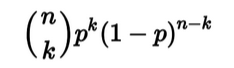

for any value of K from 0 to N , including both. 

- The firsy term is the binomial
coefficient, usually pronounced “n choose k”. It is used to calculate the number of ways to choose a subset of items from a larger set, without regard to the order of the items.

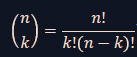

for example, from a subset of 4 things we can select 6 different subsets:  (1.2), (1,3), (1,4), (2,3), (2,4), (3,4)

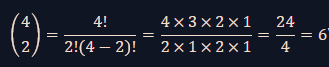






We can use the SciPy function binom.pmf to compute binomial probability. 

For example, if  
- we flip a coin n=2 times and 
- the
probability of heads is p=0.5, 
- here’s the probability of getting k=1 heads:

 For example, if we flip a coin n=2 times and the
probability of heads is p=0.5, here’s the probability of getting k=1 heads:

In [3]:
from scipy.stats import binom

n = 2
p = 0.5
k = 1

binom.pmf(k, n, p)

np.float64(0.5000000000000002)

In [6]:


n = 250
p = 0.5
k = 140

binom.pmf(k, n, p)

np.float64(0.008357181724918188)

Instead of providing a single value for k, we can also call binom.pmf with an
array of values:

In [46]:
import numpy as np

n = 2
p = 0.5



ks = np.arange(n+1)
ps = binom.pmf(ks, n, p)

ps


array([0.25, 0.5 , 0.25])

The result is a NumPy array with the probability of 0, 1, or 2 heads. If we put these probabilities in a Pmf, the result is the distribution of k for the given
values of n and p.
Here’s what it looks like:

In [47]:
from empiricaldist import Pmf
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


The following function computes the binomial distribution for given values of n
and p and returns a Pmf that represents the result:

In [71]:
def make_binomial(n, p): #Make a binomial Pmf
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

a = make_binomial(6, 0.5)
a

,probs
0,0.015625
1,0.093750
2,0.234375
3,0.312500
4,0.234375
5,0.093750
6,0.015625


In [72]:
a.max_prob()

np.int64(3)

In [ ]:
a.prob_ge(5) # Probability of getting 5 or more (greater or equal) 

np.float64(0.10937500000000003)

In [78]:
a.prob_le(2) # Probability of getting 2 or less (lesser or equal) 

np.float64(0.3437500000000002)

In [73]:
a[2]

np.float64(0.23437500000000006)

In [69]:
k = 2
n = 7
p = 0.5

binom.pmf(2, 6, 0.5)

np.float64(0.23437500000000006)

Here’s what it looks like with n=250 and p=0.5:

In [20]:
make_binomial(n=250, p=0.5)

,probs
0,5.527148e-76
1,1.381787e-73
2,1.720325e-71
3,1.422135e-69
4,8.781685e-68
...,...
246,8.781685e-68
247,1.422135e-69
248,1.720325e-71
249,1.381787e-73


The most likely quantity in this distribution is 125:

In [21]:
pmf_k = make_binomial(n=250, p=0.5)
pmf_k.max_prob()

np.int64(125)

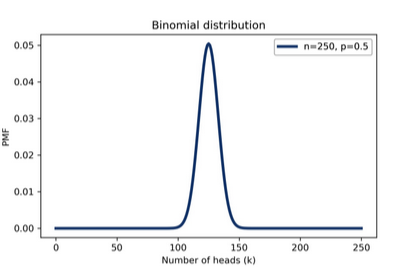

But even though it is the most likely quantity, the probability that we get exactly
125 heads is only about 5%:

In [22]:

pmf_k[125]

np.float64(0.05041221314730967)

In [23]:
pmf_k[140]

np.float64(0.008357181724918188)

We can get the same result directly with the binom.pmf function  

In [24]:
n = 250
p = 0.5
k = 140

binom.pmf(k, n, p)

np.float64(0.008357181724918188)

In the article MacKay quotes, the statistician says, _“If the coin were unbiased the
chance of getting a result as extreme as that would be less than 7%.”_

We can use the binomial distribution to check his math. 
- The following function
takes a PMF and computes __the total probability of quantities greater than or
equal to threshold__:

In [28]:
def prob_ge(pmf, threshold): # Probability of quantities greater than threshold
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

 The Pmf object has two attributes:
- qs contains the quantities in the distribution;
- ps contains the corresponding probabilities.


Here’s the probability of getting 140 heads or more:

In [29]:
prob_ge(pmf_k, 140)

np.float64(0.03321057562002166)

Pmf provides a method that does the same computation:

In [30]:
pmf_k.prob_ge(140)

np.float64(0.03321057562002166)

The result is about 3.3%, which is less than the quoted 7%. The reason for the
difference is that the statistician includes all outcomes “as extreme as” 140,
which includes outcomes less than or equal to 110.

To see where that comes from, recall that the expected number of heads is 125. If
we get 140, we’ve exceeded that expectation by 15. And if we get 110, we have
come up short by 15.
7% is the sum of both of these “tails”, as shown in the following figure:

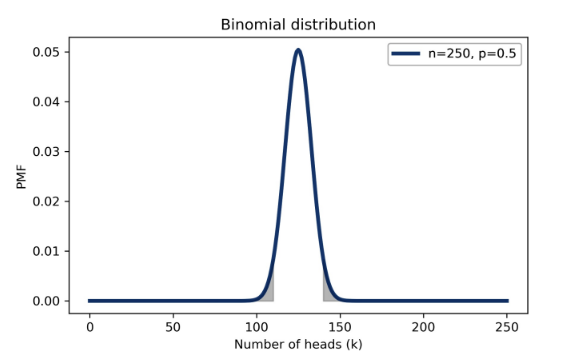

Here’s how we compute the total probability of the left tail:

In [33]:
pmf_k.prob_le(110)

np.float64(0.033210575620021665)

The probability of outcomes less than or equal to 110 is also 3.3%, so the total
probability of outcomes “as extreme” as 140 is 6.6%.
The point of this calculation is that these extreme outcomes are unlikely if the
coin is fair.

### Bayesian Estimation

Let's call x the probability of landing heads up when a coin is spun on edge.
- It seems reasonable to believe that x depends on
physical characteristics of the coin, like the distribution of weight. 
- If a coin is
perfectly balanced, we expect x to be close to 50%, but for a lopsided coin, x
might be substantially different. 
- We can use Bayes’s theorem and the observed
data to estimate x.
- For simplicity, we’ll start with a uniform prior, which assumes that all values of x
are equally likely. 
- That might not be a reasonable assumption, so we’ll come
back and consider other priors later.

We can make a uniform prior like this:

In [10]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
prior.normalize()

prior

,probs
0.00,0.009901
0.01,0.009901
0.02,0.009901
0.03,0.009901
0.04,0.009901
...,...
0.96,0.009901
0.97,0.009901
0.98,0.009901
0.99,0.009901


- hypos is a numpy array of 101 equally spaced values between 0 and 1, representing the range of possible probabilities for the coin landing on heads.
- prior is a probability mass function (PMF) representing the prior distribution of the probability of heads. Initially, it assigns equal probability (1) to all hypotheses in hypos.



We can use the hypotheses to compute the likelihoods, like this:

In [17]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

- likelihood_heads is the likelihood of observing heads given each hypothesis in hypos.

- likelihood_tails is the likelihood of observing tails given each hypothesis in hypos.

We’ll put the likelihoods for heads and tails in a dictionary to make it easier to do
the update:

In [18]:
likelihood = {
'H': likelihood_heads,
'T': likelihood_tails
}

likelihood

{'H': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 'T': array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
        0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
        0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
        0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
      

To represent the data, we’ll construct a string with H repeated 140 times and T
repeated 110 times:

In [19]:
dataset = 'H' * 140 + 'T' * 110

The following function does the update:

In [20]:
def update_euro(pmf, dataset): # Update pmf with a given sequence of H and T.
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

This function updates the PMF pmf based on the observed dataset.

For each observation in the dataset, it multiplies the PMF by the corresponding likelihood (either likelihood_heads or likelihood_tails).

After updating, it normalizes the PMF so that the total probability sums to 1.

- The first argument is a Pmf that represents the prior. 
- The second argument is a
sequence of strings. 
- Each time through the loop, we multiply pmf by the
likelihood of one outcome, H for heads or T for tails.
- Notice that normalize is outside the loop, so the posterior distribution only
gets normalized once, at the end. That’s more efficient than normalizing it after each spin (although we’ll see later that it can also cause problems with floating-
point arithmetic).

Here’s how we use update_euro:

In [21]:
posterior = prior.copy()
update_euro(posterior, dataset)

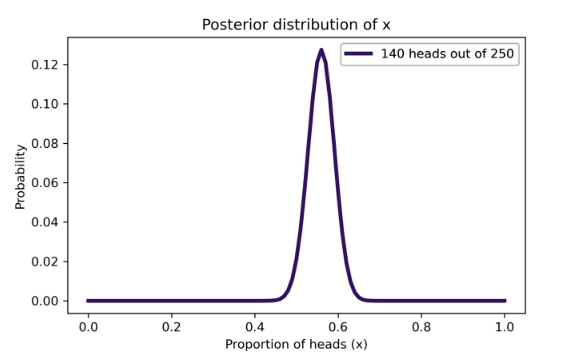

This figure shows the posterior distribution of x, which is the proportion of
heads for the coin we observed.
- The posterior distribution represents our beliefs about x after seeing the data. 
. It indicates that values less than 0.4 and greater than 0.7 are unlikely; values
between 0.5 and 0.6 are the most likely.
- In fact, the most likely value for x is 0.56, which is the proportion of heads in
the dataset, 140/250.

In [22]:
posterior.max_prob()

np.float64(0.56)

The reason we use a lot of values in hypos (hypotheses) and likelihood is to make our estimation more accurate and detailed. Here's why:
Precision and Accuracy

- Using a large number of hypotheses allows us to cover a broad range of possible probabilities for the coin being biased. This helps in achieving a more precise estimate of the true probability, especially when we have more granular data.
Continuous Spectrum

- The range of hypotheses from 0 to 1 represents all possible probabilities the coin could be biased towards heads. By having many values, we can better approximate this continuous spectrum. This way, our posterior distribution (the updated probabilities after observing the data) will be smooth and more informative.
Handling Uncertainty

- In Bayesian inference, we often deal with uncertainty. Having a fine-grained set of hypotheses helps us model and quantify this uncertainty more effectively. It allows us to see how the likelihood of each hypothesis changes as we gather more data.
Better Visualization

- When we have more data points in our hypotheses, the resulting posterior distribution can be visualized more clearly. This can help in understanding how the probability shifts with each observation and provides a clearer picture of the overall distribution.

- In summary, using many values in hypos and likelihood ensures that our estimates are more accurate, our models are more precise, and our visualizations of the posterior distributions are more informative. This is especially important in Bayesian analysis, where we update our beliefs with new data.

### Triangle Prior

So far we’ve been using a uniform prior:

In [45]:
import numpy as np
from empiricaldist import Pmf

hypos = np.linspace(0, 1, 101)
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()
uniform

,probs
0.00,0.009901
0.01,0.009901
0.02,0.009901
0.03,0.009901
0.04,0.009901
...,...
0.96,0.009901
0.97,0.009901
0.98,0.009901
0.99,0.009901


But that might not be a reasonable choice based on what we know about coins. 
- I can believe that if a coin is lopsided, x might deviate substantially from 0.5, but
it seems unlikely that the Belgian Euro coin is so imbalanced that x is 0.1 or 0.9.
- It might be more reasonable to choose a prior that gives higher probability to
values of x near 0.5 and lower probability to extreme values.

As an example, let’s try a triangle-shaped prior.

In [24]:


ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)
a = np.append(ramp_up, ramp_down)
triangle = Pmf(a, hypos, name='triangle')
triangle.normalize()
triangle

,probs
0.00,0.0000
0.01,0.0004
0.02,0.0008
0.03,0.0012
0.04,0.0016
...,...
0.96,0.0016
0.97,0.0012
0.98,0.0008
0.99,0.0004


Now we can update both priors with the same data:

In [50]:

update_euro(triangle, dataset)
update_euro(uniform, dataset)


- __The differences between the posterior distributions are barely visible, and so
small they would hardly matter in practice__.
- And that’s good news. To see why, imagine two people who disagree angrily
about which prior is better, uniform or triangle. Each of them has reasons for
their preference, but neither of them can persuade the other to change their mind.
- But suppose they agree to use the data to update their beliefs. When they
compare their posterior distributions, they find that there is almost nothing left to
argue about.
- This is an example of swamping the priors: with enough data, people who start with different priors will tend to converge on the same posterior distribution.

### The Binomial Likelihood Function

So far we’ve been computing the updates one spin at a time, so for the Euro
Problem we have to do 250 updates.
- A more efficient alternative is to compute the likelihood of the entire dataset at
once. 
- For each hypothetical value of x, we have to compute the probability of
getting 140 heads out of 250 spins.
- This is the question the binomial distribution
answers. If the probability of heads is P  the probability of K heads in  N spins is:

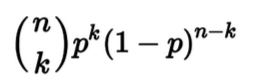

The following function takes a Pmf that
represents a prior distribution and a tuple of integers that represent the data:

In [46]:
from scipy.stats import binom

def update_binomial(pmf, data): # Update pmf using the binomial distribution.
    k, n = data
    prob_xs = pmf.qs  # qs attribute contains the quantities in the distribution
    likelihood = binom.pmf(k, n, prob_xs)
    pmf *= likelihood
    pmf.normalize()

The data are represented with a tuple of values for k and n (140, 250), rather than a long
string of outcomes. Here’s the update:

In [56]:
hypos = np.linspace(0, 1, 101)
uniform2 = Pmf(1, hypos, name = "uniform2")
uniform2.normalize()
uniform2


,probs
0.00,0.009901
0.01,0.009901
0.02,0.009901
0.03,0.009901
0.04,0.009901
...,...
0.96,0.009901
0.97,0.009901
0.98,0.009901
0.99,0.009901


In [57]:
data = 140, 250
update_binomial(uniform2, data)

We can use allclose to confirm that the result is the same as in the previous
section except for a small floating-point round-off.

In [58]:
np.allclose(uniform, uniform2)

True

In [59]:
uniform2.max_prob()

np.float64(0.56)

### Taxes

Suppose you want to know how many people cheat on their
taxes. If you ask them directly, it is likely that some of the cheaters will lie. You
can get a more accurate estimate if you ask them indirectly, like this: Ask each
person to flip a coin and, without revealing the outcome,

- If they get heads, they report YES.
- If they get tails, they honestly answer the question, “Do you cheat on
your taxes?”

If someone says YES, we don’t know whether they actually cheat on their taxes;
they might have flipped heads. Knowing this, people might be more willing to
answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs. 
- Based
on this data, what is the posterior distribution for the fraction of people who
cheat on their taxes? 
- What is the most likely quantity in the posterior
distribution?

__Variables:__

Let pp be the true proportion of people who cheat on their taxes.


Let qq be the probability of reporting YES if asked indirectly. This includes:

- Reporting YES if they honestly cheat on their taxes (which happens with probability pp).

- Reporting YES because they got heads when flipping the coin (which happens with probability 1/21/2).


__Likelihood Calculation:__

- Probability of reporting YES:

q=1/2+p/2

This means half the people say YES because they got heads, and half the people who are left will answer YES if they cheat on their taxes.


__Survey Results:__

- 80 YESes and 20 NOs out of 100 people.

__Bayesian Update:__

We will use the observed data to update our belief about pp.

__Prior:__

. Let's assume a uniform prior for pp meaning all values of pp are equally likely before observing the data.

__Posterior Calculation:__

- We can use Bayesian inference to update our prior beliefs with the likelihood of observing the data we have.

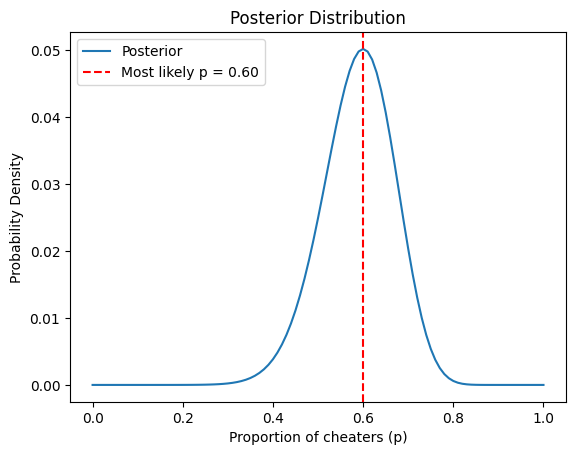

np.float64(0.6)

In [69]:
import numpy as np 
import matplotlib.pyplot as plt

# Define the likelihood function 
def likelihood(p, yes_count, no_count):
    q = 0.5 + 0.5 * p
    return (q ** yes_count) * ((1 - q) ** no_count) 

# Set up the grid of p values 
p_grid = np.linspace(0, 1, 101) 
prior = np.ones(101) # Uniform prior


# Data: 80 YESes, 20 NOs 
yes_count = 80 
no_count = 20

# Compute the unnormalized posterior 
posterior_unnormalized = likelihood(p_grid, yes_count, no_count) * prior

# Normalize the posterior 
posterior = posterior_unnormalized / posterior_unnormalized.sum()

# Find the most likely quantity (mode of the posterior) 
max_posterior_index = np.argmax(posterior) 
most_likely_p = p_grid[max_posterior_index]

# Plot the posterior distribution 
plt.plot(p_grid, posterior, label='Posterior') 
plt.xlabel('Proportion of cheaters (p)') 
plt.ylabel('Probability Density') 
plt.title('Posterior Distribution') 
plt.axvline(most_likely_p, color='r', linestyle='--', 
label=f'Most likely p = {most_likely_p:.2f}') 
plt.legend() 

plt.show()
most_likely_p




In [61]:
hypos1 = np.linspace(0, 1, 101)
uniform3 = Pmf(1, hypos)
uniform3.normalize()
uniform3

,probs
0.00,0.009901
0.01,0.009901
0.02,0.009901
0.03,0.009901
0.04,0.009901
...,...
0.96,0.009901
0.97,0.009901
0.98,0.009901
0.99,0.009901


In [63]:
data = 80, 100

update_binomial(uniform3, data)

uniform3.max_prob()

np.float64(0.8)

### Bayesian Statistics
You might have noticed similarities between the Euro Problem and the 101
Bowls Problem from the previous tutorial 
- in “101 Bowls”. The prior distributions are the same, the
likelihoods are the same, and with the same data, the results would be the same.

But there are two differences.
- The first is __the choice of the prior__. With 101 bowls, the uniform prior is implied
by the statement of the problem, which says that we choose one of the bowls at
random with equal probability.
- __In the Euro Problem, the choice of the prior is subjective__; that is, reasonable
people could disagree, maybe because they have different information about
coins or because they interpret the same information differently.
- __Because the priors are subjective, the posteriors are subjective__, too. And some
people find that problematic.


- __The other difference is the nature of what we are estimating.__ In the 101 Bowls
Problem, we choose the bowl randomly, so it is uncontroversial to compute the
probability of choosing each bowl. 
- In the Euro Problem, the proportion of heads
is a physical property of a given coin. __Under some interpretations of probability,
that’s a problem because physical properties are not considered random.__

 __Under the Bayesian interpretation of probability, it is meaningful and useful to
treat physical quantities as if they were random and compute probabilities about them__

- In the Euro Problem, the prior distribution represents what we believe about
coins in general and the posterior distribution represents what we believe about a
particular coin after seeing the data. So we can use the posterior distribution to
compute probabilities about the coin and its proportion of heads.

__The subjectivity of the prior and the interpretation of the posterior are key
differences between using Bayes’s theorem and doing Bayesian statistics.__

- Bayes’s theorem is a mathematical law of probability; no reasonable person
objects to it. But Bayesian statistics is surprisingly controversial. Historically,
many people have been bothered by its subjectivity and its use of probability for
things that are not random.